In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

import NexFileReaders
from scipy.signal import iirnotch, lfilter
from scipy.signal import butter, filtfilt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
dirtolfps = r"F:\EnclosureProjects\inprep\freemat\ephys_tests\240501_mat6_LFPs_dark\Hedy\nex5"

try:
    setofnexfiles = [file for file in os.listdir(dirtolfps) if file.endswith(".nex")]
    setofnexfiles = [os.path.join(dirtolfps, file) for file in setofnexfiles]
    print(setofnexfiles)

    #idk why but this works
    reader1 = NexFileReaders.NexFileReader()
    reader2 = NexFileReaders.NexFileReader()
    reader3 = NexFileReaders.NexFileReader()
    reader4 = NexFileReaders.NexFileReader()

    file_0 = reader1.ReadNexFile(setofnexfiles[0])
    file_1 = reader2.ReadNexFile(setofnexfiles[1])
    file_2 = reader3.ReadNexFile(setofnexfiles[2])
    file_3 = reader4.ReadNexFile(setofnexfiles[3])
except: 
    setofnexfiles = [file for file in os.listdir(dirtolfps) if file.endswith(".nex5")]
    setofnexfiles = [os.path.join(dirtolfps, file) for file in setofnexfiles]
    print(setofnexfiles)

    #idk why but this works
    reader1 = NexFileReaders.Nex5FileReader()
    reader2 = NexFileReaders.Nex5FileReader()
    reader3 = NexFileReaders.Nex5FileReader()
    reader4 = NexFileReaders.Nex5FileReader()

    file_0 = reader1.ReadNex5File(setofnexfiles[0])
    file_1 = reader2.ReadNex5File(setofnexfiles[1])
    file_2 = reader3.ReadNex5File(setofnexfiles[2])
    file_3 = reader4.ReadNex5File(setofnexfiles[3])

# Extract LFps from each:
lfps_0 = np.array([data.Values for data in file_0.Continuous])
lfps_1 = np.array([data.Values for data in file_1.Continuous])
lfps_2 = np.array([data.Values for data in file_2.Continuous])
lfps_3 = np.array([data.Values for data in file_3.Continuous])

print(f"The file 0 has {len(file_0.Continuous)} continuous data")
print(f"The file 1 has {len(file_1.Continuous)} continuous data")
print(f"The file 2 has {len(file_2.Continuous)} continuous data")
print(f"The file 3 has {len(file_3.Continuous)} continuous data")
# merge all lfps
lfps = np.concatenate([lfps_0, lfps_1, lfps_2, lfps_3], axis=0)

print(f"Total number of LFP channels: {len(lfps)}")

['F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_1-30_Hedy_v2_lfps.nex', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_31-60_Hedy_v2_lfps.nex', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_61-90_Hedy_v2_lfps.nex', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_91-128_Hedy_v2_lfps.nex']
['F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_1-30_Hedy_v2.nex5', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_31-60_Hedy_v2.nex5', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_61-90_Hedy_v2.nex5', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240501_mat6_LFPs_dark\\Hedy\\nex5\\Chan_91-128_Hedy_v2.nex5']
The file 0 has 30 continuous data
The file 1 has 30 continuous

In [3]:


cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

def plot_spectrogram(values, sampling_rate, ylim, title):
    # Define parameters
    window = 'hann'  # Windowing technique for spectral analysis
    nperseg = int(sampling_rate)  # Length of each segment (1 second)
    noverlap = int(sampling_rate / 2)  # 50% overlap
    nfft = int(2 ** np.ceil(np.log2(nperseg)))  # Number of points in FFT, next power of 2 from segment length
    
    # Generate the spectrogram
    f, t, Sxx = spectrogram(values, fs=sampling_rate, window=window, nperseg=nperseg, noverlap=noverlap, nfft=nfft, scaling='spectrum')
    mask = f <= ylim
    f = f[mask]
    Sxx = Sxx[mask, :]
    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=parula_map, vmin=-100, vmax=-30)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(title)
    plt.colorbar(label='Power Spectral Density (dB)')
    plt.ylim(0, ylim)  # Limit frequency up to 300 Hz
    plt.show()

def remove_unwanted_frequencies(signal, fs, freqs, bandwidth, chunk_size=5000):
    # Create a bandstop filter for each frequency
    for freq in freqs:
        nyquist = fs / 2.0
        low = (freq - bandwidth/2.0) / nyquist
        high = (freq + bandwidth/2.0) / nyquist
        b, a = butter(2, [low, high], btype='bandstop')
        
        # Process the signal in chunks
        for i in range(0, len(signal), chunk_size):
            signal[i:i+chunk_size] = filtfilt(b, a, signal[i:i+chunk_size])
    return signal

In [2]:
import gc 
gc.collect()

0

C:\Users\Felipe Parodi\AppData\Local\Temp\ipykernel_19176\3505242525.py:59: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=parula_map, vmin=-100, vmax=-30)


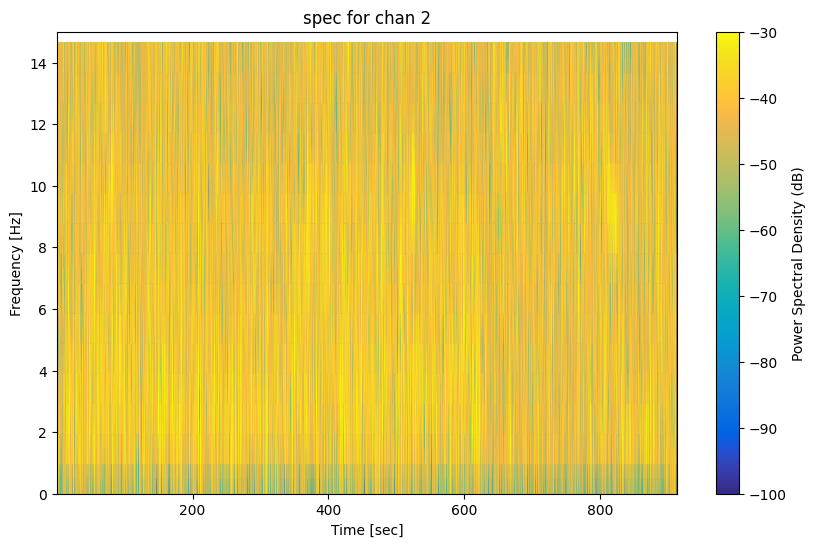

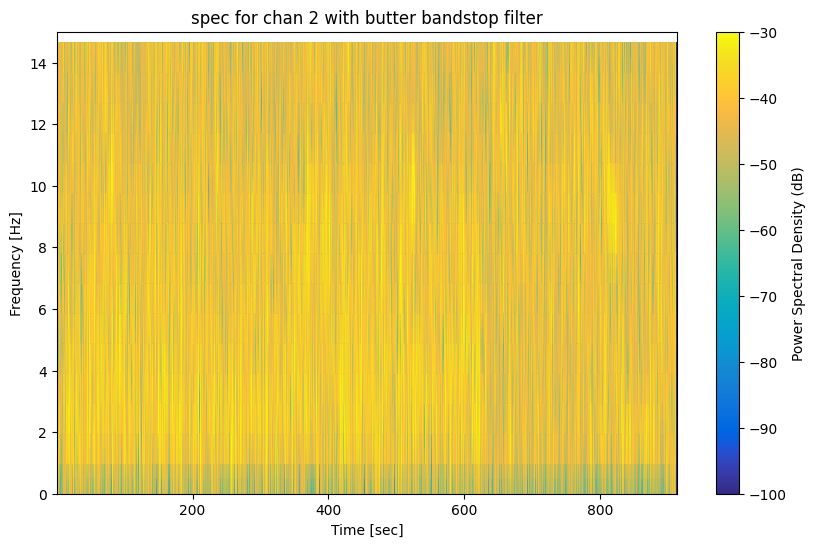

In [4]:
sampling_rate = 32000
fs = sampling_rate  # replace with your actual sampling rate
unwanted_freqs = [60, 120, 180, 240, 300]  # replace with your actual unwanted frequencies

# Define the bandwidth of the stop band
bandwidth = 2  # replace with your desired bandwidth

channel = 1
data = lfps[channel]

ylim = 15
title = f"spec for chan {channel+1}"
plot_spectrogram(data, sampling_rate,ylim, title)

filtered_signal = remove_unwanted_frequencies(lfps, fs, unwanted_freqs, bandwidth)

channel = 1
# data = filtered_lfps[channel] ## iir notch
data = filtered_signal[channel] ## bandstop
ylim = 15
title = f"spec for chan {channel+1} with butter bandstop filter"
plot_spectrogram(data, sampling_rate,ylim, title)

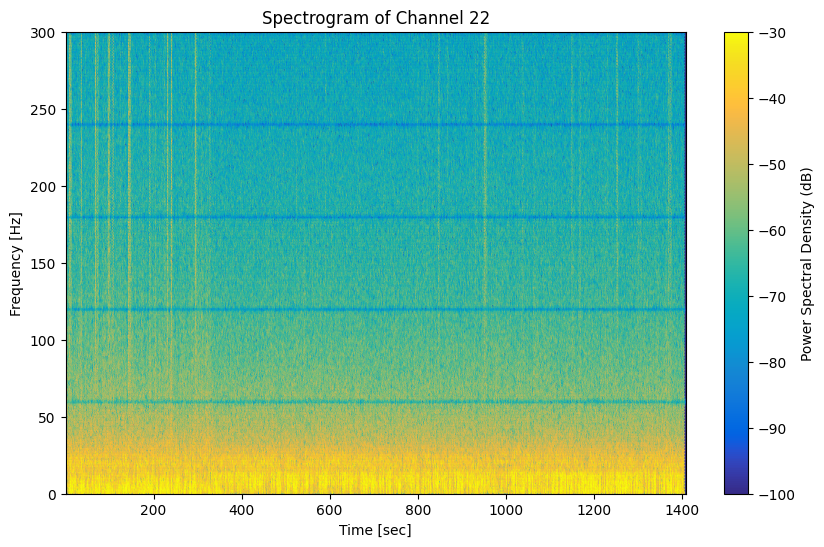

In [18]:
# Example of plotting a spectrogram for a single channel
plot_spectrogram(lfps[21, :], fs, 300, "Spectrogram of Channel 22")


### Compute alpha power

C:\Users\Felipe Parodi\AppData\Local\Temp\ipykernel_19176\4039763840.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis', vmin=-100, vmax=-30)


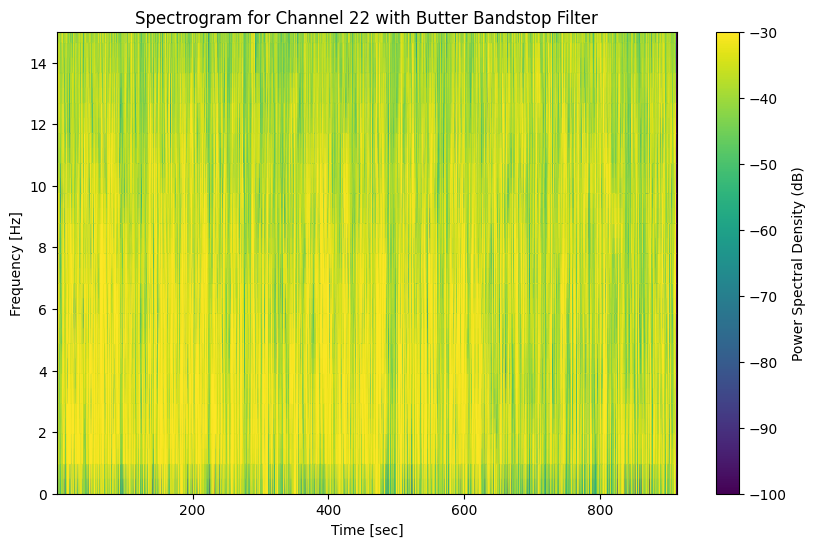

Alpha Power: 0.0016819985262372938


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def calculate_and_plot_spectrogram(values, sampling_rate, ylim, title):
    # Define parameters for the spectrogram
    window = 'hann'
    nperseg = int(sampling_rate)  # One second of data per segment
    noverlap = int(sampling_rate / 2)  # 50% overlap
    nfft = int(2 ** np.ceil(np.log2(nperseg)))  # Power of two for FFT efficiency

    # Generate the spectrogram
    f, t, Sxx = spectrogram(values, fs=sampling_rate, window=window, nperseg=nperseg, noverlap=noverlap, nfft=nfft, scaling='spectrum')

    # Mask to select frequencies up to ylim (15 Hz here, but we focus on 8-12 Hz for alpha)
    mask = (f >= 8) & (f <= 12)
    f_alpha = f[mask]
    Sxx_alpha = Sxx[mask, :]

    # Calculate the alpha power by integrating the PSD across the alpha band
    alpha_power = np.trapz(np.mean(Sxx_alpha, axis=1), f_alpha)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis', vmin=-100, vmax=-30)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(title)
    plt.colorbar(label='Power Spectral Density (dB)')
    plt.ylim(0, ylim)  # Limit frequency up to 15 Hz for visibility
    plt.show()

    return alpha_power

# Usage
channel = 21
data = filtered_signal[channel]
sampling_rate = 32000  # Define your sampling rate appropriately
ylim = 15
title = f"Spectrogram for Channel {channel+1} with Butter Bandstop Filter"
alpha_power = calculate_and_plot_spectrogram(data, sampling_rate, ylim, title)
print("Alpha Power:", alpha_power)


In [6]:
def calculate_alpha_power(values, sampling_rate):
    # Spectrogram parameters
    window = 'hann'
    nperseg = int(sampling_rate)  # One second per segment
    noverlap = int(sampling_rate / 2)  # 50% overlap
    nfft = int(2 ** np.ceil(np.log2(nperseg)))  # next power of 2 from segment length

    # Generate the spectrogram
    f, t, Sxx = spectrogram(values, fs=sampling_rate, window=window, nperseg=nperseg, noverlap=noverlap, nfft=nfft, scaling='spectrum')

    # Calculate alpha power (8-12 Hz)
    mask = (f >= 8) & (f <= 12)
    f_alpha = f[mask]
    Sxx_alpha = Sxx[mask, :]
    alpha_power = np.trapz(np.mean(Sxx_alpha, axis=1), f_alpha)

    return alpha_power


In [7]:
fs = 32000  # Example sampling rate
num_samples_5min = 10 * 60 * fs  # Number of samples in 5 minutes

In [8]:
from joblib import Parallel, delayed

# Parallel computation of alpha power
pre_transition_power = Parallel(n_jobs=-1)(delayed(calculate_alpha_power)(filtered_signal[channel, :num_samples_5min], fs) for channel in range(filtered_signal.shape[0]))
post_transition_power = Parallel(n_jobs=-1)(delayed(calculate_alpha_power)(filtered_signal[channel, num_samples_5min:], fs) for channel in range(filtered_signal.shape[0]))


In [9]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(pre_transition_power, post_transition_power)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 13.69843402844761
p-value: 8.687683611362808e-27


In [10]:
def cohens_d(x, y):
    from numpy import mean, var, sqrt
    n = len(x)
    d = (mean(x) - mean(y)) / sqrt((var(x) + var(y)) / 2)
    return d

d = cohens_d(pre_transition_power, post_transition_power)
print("Cohen's d:", d)

Cohen's d: 0.20671421241928292


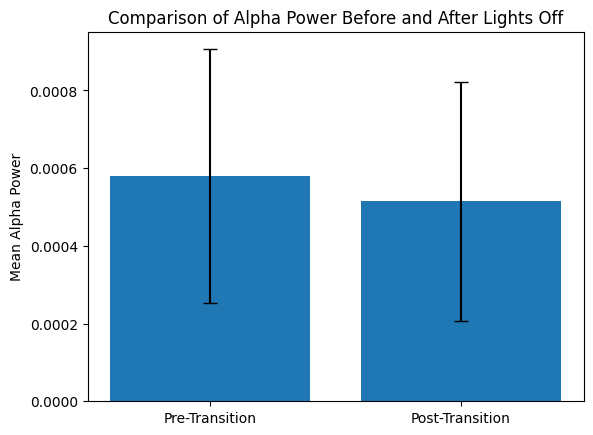

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(['Pre-Transition', 'Post-Transition'], [np.mean(pre_transition_power), np.mean(post_transition_power)], yerr=[np.std(pre_transition_power), np.std(post_transition_power)], capsize=5)
plt.ylabel('Mean Alpha Power')
plt.title('Comparison of Alpha Power Before and After Lights Off')
plt.show()

Channel with maximum alpha power pre-transition: Channel 22 (Power: 0.0017272575405513635)
Channel with maximum alpha power post-transition: Channel 22 (Power: 0.00159417521672367)


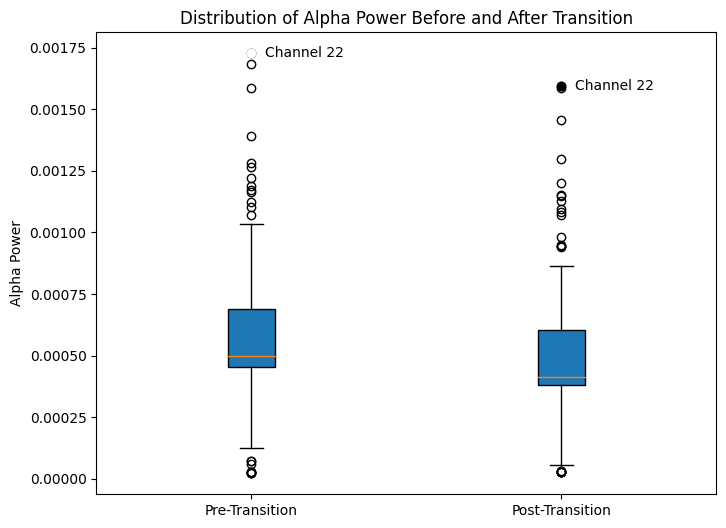

In [12]:
import numpy as np

# Find the index of the maximum alpha power for pre-transition
max_pre_index = np.argmax(pre_transition_power)
max_pre_channel = max_pre_index + 1  # Assuming channel numbering starts at 1

# Find the index of the maximum alpha power for post-transition
max_post_index = np.argmax(post_transition_power)
max_post_channel = max_post_index + 1  # Assuming channel numbering starts at 1

print(f"Channel with maximum alpha power pre-transition: Channel {max_pre_channel} (Power: {pre_transition_power[max_pre_index]})")
print(f"Channel with maximum alpha power post-transition: Channel {max_post_channel} (Power: {post_transition_power[max_post_index]})")

import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot([pre_transition_power, post_transition_power], labels=['Pre-Transition', 'Post-Transition'], patch_artist=True)

# Highlight the max points
plt.scatter([1], [pre_transition_power[max_pre_index]], color='white', zorder=3, label=f'Channel {max_pre_channel}')
plt.scatter([2], [post_transition_power[max_post_index]], color='black', zorder=3, label=f'Channel {max_post_channel}')

# Add annotations
plt.annotate(f'Channel {max_pre_channel}', (1, pre_transition_power[max_pre_index]), textcoords="offset points", xytext=(10,0), ha='left', va='center')
plt.annotate(f'Channel {max_post_channel}', (2, post_transition_power[max_post_index]), textcoords="offset points", xytext=(10,0), ha='left', va='center')

plt.ylabel('Alpha Power')
plt.title('Distribution of Alpha Power Before and After Transition')
# plt.legend()
plt.show()

In [13]:
import numpy as np
from scipy.signal import welch

def calculate_alpha_power(data, fs):
    alpha_band = [8, 12]  # Alpha band frequencies
    nperseg = int(fs * 0.5)  # Half a second
    f, Pxx = welch(data, fs=fs, nperseg=nperseg)
    alpha_idx = (f >= alpha_band[0]) & (f <= alpha_band[1])
    alpha_power = np.trapz(Pxx[alpha_idx], f[alpha_idx])
    return alpha_power

time_interval = 60 * fs  # 1-minute intervals
num_intervals = filtered_signal.shape[1] // time_interval
all_alpha_powers = np.zeros((filtered_signal.shape[0], num_intervals))

for channel in range(filtered_signal.shape[0]):
    for interval in range(num_intervals):
        start = interval * time_interval
        end = start + time_interval
        data_segment = filtered_signal[channel, start:end]
        all_alpha_powers[channel, interval] = calculate_alpha_power(data_segment, fs)


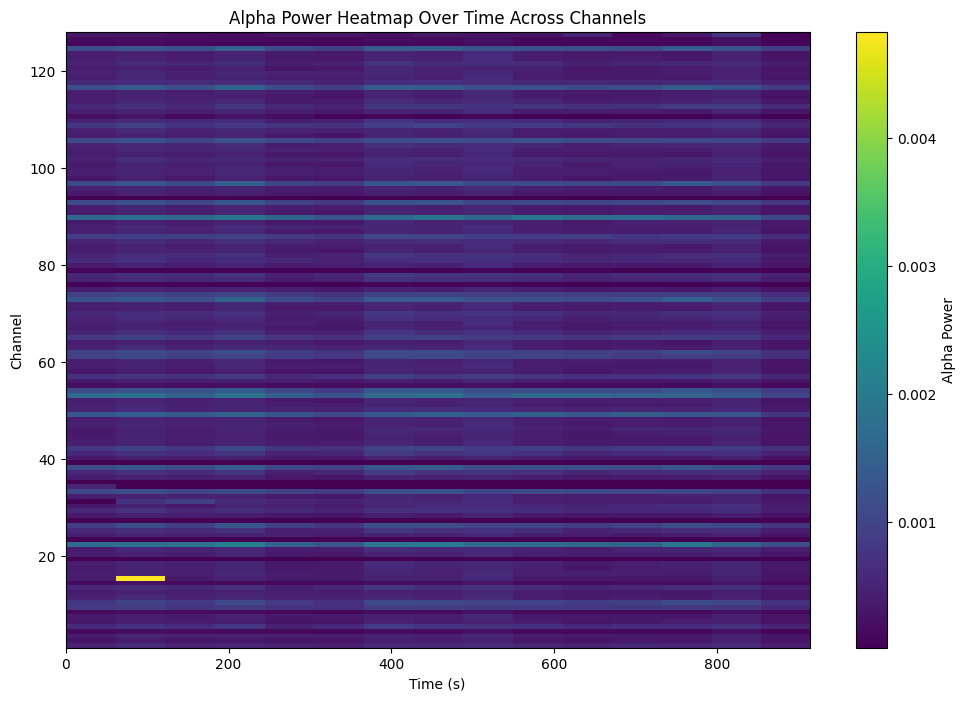

In [14]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 8))
plt.imshow(all_alpha_powers, aspect='auto', origin='lower', cmap='viridis', extent=[0, filtered_signal.shape[1] / fs, 1, filtered_signal.shape[0]])
plt.colorbar(label='Alpha Power')
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.title('Alpha Power Heatmap Over Time Across Channels')
plt.show()